# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retrieval")
print("------------------------")

cloudiness = []
country = []
date = []
humidity = []
longitude = []
latitude = []
max_temp = []
wind_speed = []

for record, i in enumerate(cities):
    target_url = f"{url}appid={weather_api_key}&units={units}&q={i}"
    response = requests.get(target_url)
    data = response.json()
    
    try:
        cloudiness.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        humidity.append(data["main"]["humidity"])
        longitude.append(data["coord"]["lon"])
        latitude.append(data["coord"]["lat"])
        max_temp.append(data["main"]["temp_max"])
        wind_speed.append(data["wind"]["speed"])
        
        print(f"Processing Record {record+1} | {i}")
    
    except (KeyError, ValueError):
        print("City not found. Skipping...")

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | lebu
Processing Record 2 | puerto ayora
Processing Record 3 | faanui
Processing Record 4 | upernavik
Processing Record 5 | atuona
Processing Record 6 | haines junction
Processing Record 7 | kodiak
City not found. Skipping...
Processing Record 9 | rikitea
Processing Record 10 | gornopravdinsk
Processing Record 11 | barrow
Processing Record 12 | saskylakh
Processing Record 13 | bluff
City not found. Skipping...
Processing Record 15 | vaini
City not found. Skipping...
Processing Record 17 | tucupita
Processing Record 18 | cape town
Processing Record 19 | hualmay
Processing Record 20 | baruun-urt
Processing Record 21 | albany
Processing Record 22 | vila franca do campo
Processing Record 23 | ushuaia
Processing Record 24 | tenosique
City not found. Skipping...
Processing Record 26 | mikhaylovka
Processing Record 27 | torbay
Processing Record 28 | punta arenas
Processing Record 29 | pacific grove
Processing Record 30 | a

Processing Record 252 | egvekinot
Processing Record 253 | iqaluit
Processing Record 254 | provideniya
Processing Record 255 | port hawkesbury
Processing Record 256 | fairbanks
Processing Record 257 | madhoganj
Processing Record 258 | luderitz
Processing Record 259 | solnechnyy
Processing Record 260 | tiarei
Processing Record 261 | terra santa
Processing Record 262 | mahuva
Processing Record 263 | bethel
Processing Record 264 | mantua
Processing Record 265 | airai
Processing Record 266 | east london
Processing Record 267 | saint-georges
Processing Record 268 | kavieng
Processing Record 269 | havre-saint-pierre
Processing Record 270 | donetsk
Processing Record 271 | quesnel
Processing Record 272 | soyo
Processing Record 273 | loukhi
Processing Record 274 | astoria
Processing Record 275 | ust-nera
Processing Record 276 | ryotsu
Processing Record 277 | norrtalje
Processing Record 278 | shangrao
Processing Record 279 | san policarpo
Processing Record 280 | naryan-mar
Processing Record 281 |

Processing Record 502 | evensk
Processing Record 503 | dudinka
Processing Record 504 | pocone
Processing Record 505 | bereda
Processing Record 506 | robertsport
Processing Record 507 | ostrovnoy
Processing Record 508 | norfolk
Processing Record 509 | kotlas
Processing Record 510 | roald
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 514 | san cristobal
Processing Record 515 | maningrida
Processing Record 516 | mehamn
Processing Record 517 | lata
Processing Record 518 | honiara
Processing Record 519 | kutum
Processing Record 520 | flinders
Processing Record 521 | livenka
Processing Record 522 | cururupu
Processing Record 523 | kibaya
Processing Record 524 | saint-joseph
Processing Record 525 | zonguldak
Processing Record 526 | roebourne
Processing Record 527 | emerald
Processing Record 528 | igarka
Processing Record 529 | calabozo
Processing Record 530 | kibuye
Processing Record 531 | bardiyah
Processing Record 532 | nautla
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
print(len(cities), len(cloudiness), len(country), len(date), 
      len(humidity), len(longitude), len(latitude), len(max_temp), len(wind_speed))
cities_weather = {"City": cities, 
                  "Cloudiness": cloudiness, 
                  "Country": country, 
                  "Date": date, 
                  "Humidity": humidity,
                  "Latitude": latitude, 
                  "Longitude": longitude, 
                  "Max Temp": max_temp, 
                  "Wind Speed": wind_speed}

cities_weather_df = pd.DataFrame({key:pd.Series(value) for key, value in cities_weather.items()})
cities_weather_df

623 570 570 570 570 570 570 570 570


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,lebu,12.0,CL,1.620542e+09,91.0,-37.6167,-73.6500,52.88,12.73
1,puerto ayora,59.0,EC,1.620542e+09,93.0,-0.7393,-90.3518,75.00,5.01
2,faanui,100.0,PF,1.620542e+09,74.0,-16.4833,-151.7500,80.60,8.48
3,upernavik,100.0,GL,1.620542e+09,96.0,72.7868,-56.1549,25.05,3.38
4,atuona,11.0,PF,1.620542e+09,71.0,-9.8000,-139.0333,80.28,17.63
...,...,...,...,...,...,...,...,...,...
618,jinji,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,voloshka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620,gravelbourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621,ous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cities_weather_df.shape

(623, 9)

In [56]:
clean_cities_weather_df = cities_weather_df.dropna()
clean_cities_weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,lebu,12.0,CL,1.620542e+09,91.0,-37.6167,-73.6500,52.88,12.73
1,puerto ayora,59.0,EC,1.620542e+09,93.0,-0.7393,-90.3518,75.00,5.01
2,faanui,100.0,PF,1.620542e+09,74.0,-16.4833,-151.7500,80.60,8.48
3,upernavik,100.0,GL,1.620542e+09,96.0,72.7868,-56.1549,25.05,3.38
4,atuona,11.0,PF,1.620542e+09,71.0,-9.8000,-139.0333,80.28,17.63
...,...,...,...,...,...,...,...,...,...
565,solovetskiy,98.0,CN,1.620543e+09,52.0,23.2281,110.8261,91.45,9.01
566,windhoek,100.0,RU,1.620543e+09,97.0,61.3314,40.0858,37.90,7.54
567,caravelas,100.0,CA,1.620543e+09,80.0,49.8834,-106.5512,35.60,6.91
568,mayumba,42.0,RU,1.620543e+09,47.0,60.9058,61.5186,67.48,4.29


In [57]:
clean_cities_weather_df.to_csv(r"cities_data_file.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
def humidity_over_100(s):
    over_100 = s.to_numpy()
    return (over_100[0] > 100).all()
humidity_over_100(clean_cities_weather_df["Humidity"])

False

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

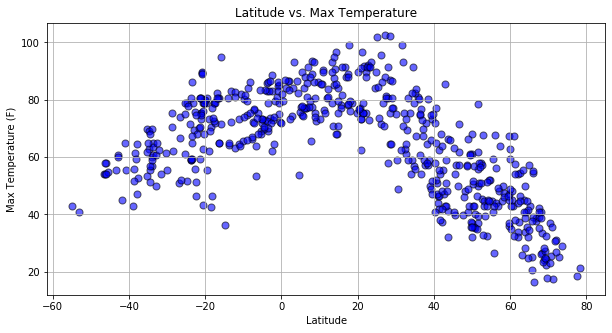

<Figure size 432x288 with 0 Axes>

In [96]:
latitude_values = clean_cities_weather_df["Latitude"]
temp_values = clean_cities_weather_df["Max Temp"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, temp_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression